In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

## Region Preserve

In [2]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()
str2reg_df = pd.read_csv(MajorBrainDivisions, delimiter="\t")

In [3]:
Sib_Bias_avgz = pd.read_csv("dat/bias2/ASD.Siblings.spec.bias.csv", index_col="STR") # dat/bias2/ASD_LGD_Dmis2_spec.bias.csv
Sib_Bias_avgz = pd.read_csv("dat/bias2/ASD_LGD_Dmis2_spec.bias.csv", index_col="STR")
#SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
#SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
#SparkMetaBias = SparkMetaBias.set_index("STR")
SparkMetaBias = pd.read_csv("dat/bias2/ASD.Meta.2.Spec.bias.csv", index_col="STR")

In [4]:
topNs = list(range(150, 10, -5))
ASD_Conn_Z, ASD_Cohe_Z, ASD_Conn_P, ASD_Cohe_P, ASD_Conn_E, ASD_Cohe_E = [],[],[],[],[],[]
Sib_Conn_Z, Sib_Cohe_Z, Sib_Conn_P, Sib_Cohe_P, Sib_Conn_E, Sib_Cohe_E = [],[],[],[],[],[]
for topN in topNs:
    print(topN)
    Permuted_ASD_cohe = []
    Permuted_ASD_conn = []
    Permuted_Sib_cohe = []
    Permuted_Sib_conn = []
    for i in range(1000):
        adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
        g_perm = LoadConnectome2(adj_mat_perm)
        asd_cohe, asd_conn = ScoreSTRSet(g_perm, SparkMetaBias.head(topN).index.values, EdgeWeightsDict)
        sib_cohe, sib_conn = ScoreSTRSet(g_perm, Sib_Bias_avgz.head(topN).index.values, EdgeWeightsDict)
        Permuted_ASD_cohe.append(asd_cohe)
        Permuted_ASD_conn.append(asd_conn)
        Permuted_Sib_cohe.append(sib_cohe)
        Permuted_Sib_conn.append(sib_conn)
    asd_cohe, asd_conn = ScoreSTRSet(g, SparkMetaBias.head(topN).index.values, EdgeWeightsDict)
    sib_cohe, sib_conn = ScoreSTRSet(g, Sib_Bias_avgz.head(topN).index.values, EdgeWeightsDict)
    
    asd_z_conn, asd_p_conn = GetPermutationP(Permuted_ASD_conn, asd_conn)
    asd_z_cohe, asd_p_cohe = GetPermutationP(Permuted_ASD_cohe, asd_cohe)
    effect_conn = asd_conn/np.mean(Permuted_ASD_conn)
    effect_cohe = asd_cohe/np.mean(Permuted_ASD_cohe)
    ASD_Conn_Z.append(asd_z_conn); ASD_Cohe_Z.append(asd_z_cohe)
    ASD_Conn_P.append(asd_p_conn); ASD_Cohe_P.append(asd_p_cohe)
    ASD_Conn_E.append(effect_conn); ASD_Cohe_E.append(effect_cohe)
    
    sib_z_conn, sib_p_conn = GetPermutationP(Permuted_Sib_conn, sib_conn)
    sib_z_cohe, sib_p_cohe = GetPermutationP(Permuted_Sib_cohe, sib_cohe)
    effect_conn = sib_conn/np.mean(Permuted_Sib_conn)
    effect_cohe = sib_cohe/np.mean(Permuted_Sib_cohe)
    Sib_Conn_Z.append(sib_z_conn); Sib_Cohe_Z.append(sib_z_cohe)
    Sib_Conn_P.append(sib_p_conn); Sib_Cohe_P.append(sib_p_cohe)
    Sib_Conn_E.append(effect_conn); Sib_Cohe_E.append(effect_cohe)
    
    print(asd_conn, np.mean(Permuted_ASD_conn))

150
2193 1987.596
145
2018 1813.937
140
1927 1710.087
135
1854 1635.218
130
1755 1542.161
125
1630 1414.005
120
1495 1287.86
115
1434 1221.239
110
1331 1127.126
105
1261 1054.089
100
1210 998.531
95
1153 950.512
90
1080 876.0
85
935 774.308
80
826 670.561
75
728 595.632
70
661 527.574
65
585 460.51
60
480 380.931
55
394 320.864
50
321 269.036
45
268 227.23
40
231 193.409
35
174 151.292
30
107 96.086
25
63 54.599
20
45 35.358
15
28 23.708


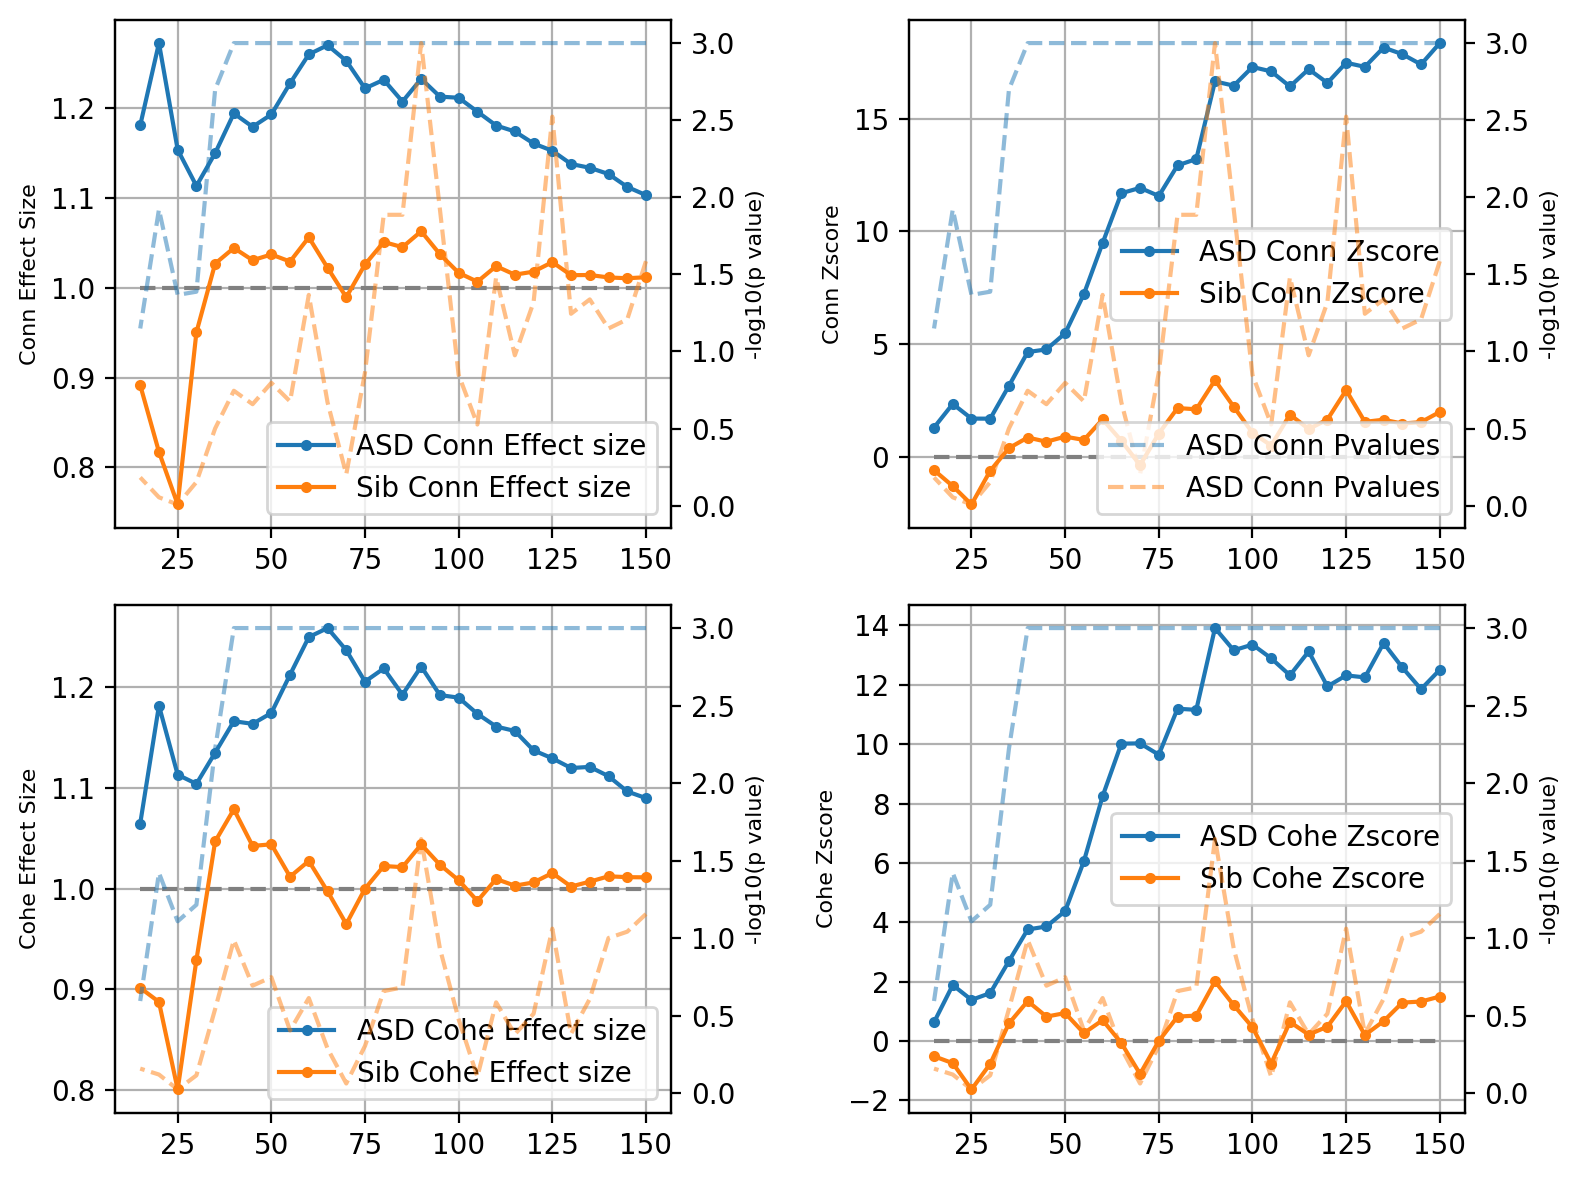

In [5]:
ASD_Conn_P = np.array(ASD_Conn_P)
fig, axs = plt.subplots(2,2, dpi=200, figsize=(8,6))
axs[0,0].plot(topNs, ASD_Conn_E, label="ASD Conn Effect size", marker='.')
axs[0,0].plot(topNs, Sib_Conn_E, label="Sib Conn Effect size", marker='.')
axs[0,0].hlines(xmin=min(topNs), xmax=max(topNs), y=1, ls="--", color="grey")
axs[0,0].grid(True)
axs[0,0].legend(loc=0)
axs[0,0].set_ylabel("Conn Effect Size",fontsize=8)
ax2=axs[0,0].twinx()
ax2.plot(topNs, -np.log10(ASD_Conn_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.plot(topNs, -np.log10(Sib_Conn_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.set_ylabel("-log10(p value)",fontsize=8)
#ax2.legend(loc=0)

axs[0,1].plot(topNs, ASD_Conn_Z, label="ASD Conn Zscore", marker='.')
axs[0,1].plot(topNs, Sib_Conn_Z, label="Sib Conn Zscore", marker='.')
axs[0,1].hlines(xmin=min(topNs), xmax=max(topNs), y=0, ls="--", color="grey")
axs[0,1].grid(True)
axs[0,1].legend(loc=0)
axs[0,1].set_ylabel("Conn Zscore",fontsize=8)
ax2=axs[0,1].twinx()
ax2.plot(topNs, -np.log10(ASD_Conn_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.plot(topNs, -np.log10(Sib_Conn_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.set_ylabel("-log10(p value)",fontsize=8) 
ax2.legend(loc=0)

axs[1,0].plot(topNs, ASD_Cohe_E, label="ASD Cohe Effect size", marker='.')
axs[1,0].plot(topNs, Sib_Cohe_E, label="Sib Cohe Effect size", marker='.')
axs[1,0].hlines(xmin=min(topNs), xmax=max(topNs), y=1, ls="--", color="grey")
axs[1,0].grid(True)
axs[1,0].legend()
axs[1,0].set_ylabel("Cohe Effect Size",fontsize=8)
ax2=axs[1,0].twinx()
ax2.plot(topNs, -np.log10(ASD_Cohe_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.plot(topNs, -np.log10(Sib_Cohe_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.set_ylabel("-log10(p value)",fontsize=8)

axs[1,1].plot(topNs, ASD_Cohe_Z, label="ASD Cohe Zscore", marker='.')
axs[1,1].plot(topNs, Sib_Cohe_Z, label="Sib Cohe Zscore", marker='.')
axs[1,1].hlines(xmin=min(topNs), xmax=max(topNs), y=0, ls="--", color="grey")
axs[1,1].grid(True)
axs[1,1].legend()
axs[1,1].set_ylabel("Cohe Zscore",fontsize=8)
ax2=axs[1,1].twinx() 
ax2.plot(topNs, -np.log10(ASD_Cohe_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.plot(topNs, -np.log10(Sib_Cohe_P), label="ASD Conn Pvalues", alpha=0.5, ls="--")
ax2.set_ylabel("-log10(p value)",fontsize=8)

plt.tight_layout()
plt.savefig("figs/Edge_Permutation.ASD.Sib.topN.pdf")

## Negative Test

In [58]:
NegaBiasDF = pd.read_csv("dat/bias2/ASD.neg.Meta.Spec.bias.csv", index_col="STR")
xxx = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
STRSet1 = GetBestCoheSAFil(xxx, False, False, g, EdgeWeightsDict)
STRSet2 = NegaBiasDF.head(20).index

Best Cohe 0.384	Exp 0.235	Rate 1.635


In [80]:
g_longdist = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_expression_distal.csv")

In [81]:
for i in range(0, 200, 20):
    STRSet2_ = NegaBiasDF.index.values[i:i+20]
    #ASD_ConnSet1, ASD_ConnSet2, Connbet2 = ScoreTwoComponents(g, STRSet1, STRSet2_)
    ASD_ConnSet1, ASD_ConnSet2, Connbet2 = ScoreTwoComponents(g_longdist, STRSet1, STRSet2_)
    print(len(ASD_ConnSet1), len(ASD_ConnSet2), len(Connbet2))

90 22 92
90 8 88
90 21 61
90 7 99
90 12 75
90 26 52
90 17 58
90 7 49
90 9 69
90 1 63


In [40]:
len(ConnSet1), len(ConnSet2), len(Conn_bet)

(263, 101, 90)

In [51]:
ASD_ConnSet1, ASD_ConnSet2, Connbet = ScoreTwoComponents(g, STRSet1, STRSet2)
print(len(ASD_ConnSet1), len(ASD_ConnSet2), len(Connbet))

263 101 114


In [78]:
perm_ConnSet1, perm_ConnSet2, perm_Connbet = [], [], []
for i in range(1, 502, 1):
        #adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
        adj_mat_perm = pd.read_csv("dat/perm-maintain_region/con-{}.csv".format(i), index_col=0)
        g_perm = LoadConnectome2(adj_mat_perm)
        _ConnSet1, _ConnSet2, _Connbet = ScoreTwoComponents(g_perm, STRSet1, STRSet2)
        perm_ConnSet1.append(len(_ConnSet1))
        perm_ConnSet2.append(len(_ConnSet2))
        perm_Connbet.append(len(_Connbet))

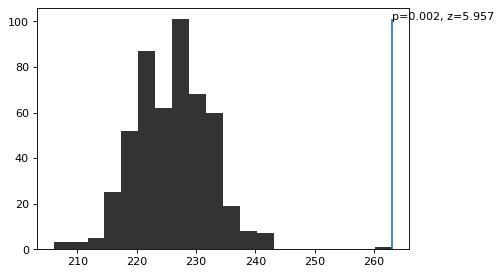

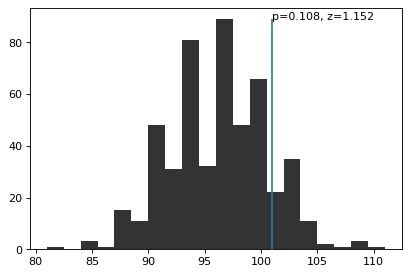

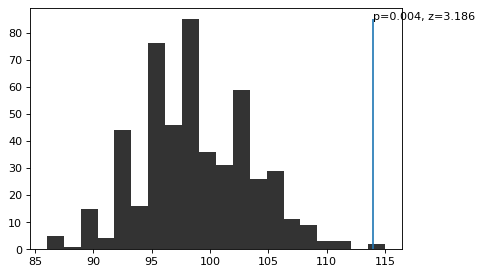

In [79]:
PlotPermutationP(perm_ConnSet1, len(ConnSet1))
PlotPermutationP(perm_ConnSet2, len(ConnSet2))
PlotPermutationP(perm_Connbet, len(Connbet))

## Distance Preserve

In [94]:
cartesian_dist_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv", index_col=0)

In [95]:
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Cartesian_distances_w_edge = MaskDistMat(adj_mat, cartesian_dist_mat, cutoff=0)

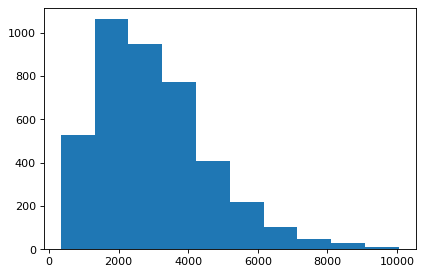

2750.738536606747


In [96]:
Cartesian_distances = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]
Cartesian_distances_deciles = np.percentile(Cartesian_distances, np.arange(0, 100, 10))
plt.hist(Cartesian_distances)
plt.show()
print(np.median(Cartesian_distances))

In [113]:
min(Cartesian_distances)

333.5416016031584

In [99]:
Cartesian_distances_deciles
print([round(x, 2) for x in Cartesian_distances_deciles])

[333.54, 1186.04, 1563.65, 1971.99, 2342.11, 2750.74, 3183.41, 3649.83, 4199.02, 5153.08]


In [123]:
def find_length_group(value, Groups):
    for i in range(1, len(Groups), 1):
        if Groups[i] > value and value < Groups[i]:
            return i - 1
    return len(Groups) -1

In [128]:
Dist_Conn_Groups = {}
Possbile_Conn_Groups = {}
XXX = {}
for STR_i in adj_mat.index.values:
    if STR_i not in XXX:
        XXX[STR_i] = {}
    for STR_j in adj_mat.index.values:
        if STR_j not in XXX:
            XXX[STR_j] = {}
        
        
        conn_dist = cartesian_dist_mat.loc[STR_i, STR_j]
        conn_w = adj_mat.loc[STR_i, STR_j]        
        if conn_w != 0:
            dist_idx = find_length_group(conn_dist, Cartesian_distances_deciles)
            if dist_idx not in Dist_Conn_Groups:
                Dist_Conn_Groups[dist_idx] = [(STR_i, STR_j, conn_w)]
            else:
                Dist_Conn_Groups[dist_idx].append((STR_i, STR_j, conn_w))
            if dist_idx not in Possbile_Conn_Groups:
                Possbile_Conn_Groups[dist_idx] = [(STR_i, STR_j)]
            else:
                Possbile_Conn_Groups[dist_idx].append((STR_i, STR_j))

In [125]:
Dist_Conn_Groups.keys()

dict_keys([6, 9, 1, 5, 0, 7, 4, 2, 8, 3])

In [127]:
str_i, str_j, w = Dist_Conn_Groups[0][0]
print(str_i, str_j, w)
# other possible nodes: same distance group of str_i; 
#str_i, str_j

Anterior_cingulate_area_dorsal_part Anterior_cingulate_area_ventral_part 3.87852105284297


In [137]:
Dist_Conn_Groups = {}
Possbile_Conn_Groups = {}

for STR_i in adj_mat.index.values:
    for STR_j in adj_mat.index.values:
        conn_dist = cartesian_dist_mat.loc[STR_i, STR_j]
        dist_idx = find_length_group(conn_dist, Cartesian_distances_deciles)
        conn_w = adj_mat.loc[STR_i, STR_j]    
        if dist_idx not in Possbile_Conn_Groups:
            Possbile_Conn_Groups[dist_idx] = []
        Possbile_Conn_Groups[dist_idx].append((STR_i, STR_j))
        if conn_w != 0:
            if dist_idx not in Dist_Conn_Groups:
                Dist_Conn_Groups[dist_idx] = []
            Dist_Conn_Groups[dist_idx].append((STR_i, STR_j, conn_w))
    

In [144]:
STR_Degree_Dict = {}
for dist_idx in Dist_Conn_Groups:
    STR_Degree_Dict[dist_idx] = {}
    for (STR_i, STR_j, conn_w) in Dist_Conn_Groups[dist_idx]:
        if STR_i not in STR_Degree_Dict[dist_idx]:
            STR_Degree_Dict[dist_idx][STR_i] = [0,0]
        if STR_j not in STR_Degree_Dict[dist_idx]:
            STR_Degree_Dict[dist_idx][STR_j] = [0,0]
        STR_Degree_Dict[dist_idx][STR_i][0] += 1
        STR_Degree_Dict[dist_idx][STR_j][1] += 1

In [145]:
STR_Degree_Dict[0]

{'Anterior_cingulate_area_dorsal_part': [2, 1],
 'Anterior_cingulate_area_ventral_part': [0, 1],
 'Secondary_motor_area': [2, 2],
 'Nucleus_accumbens': [2, 0],
 'Lateral_preoptic_area': [6, 3],
 'Substantia_innominata': [0, 3],
 'Anterior_hypothalamic_nucleus': [7, 7],
 'Dorsomedial_nucleus_of_the_hypothalamus': [5, 6],
 'Lateral_hypothalamic_area': [4, 5],
 'Paraventricular_hypothalamic_nucleus': [5, 4],
 'Nucleus_of_reuniens': [4, 2],
 'Tuberal_nucleus': [3, 5],
 'Ventromedial_hypothalamic_nucleus': [1, 4],
 'Agranular_insular_area_dorsal_part': [2, 1],
 'Agranular_insular_area_ventral_part': [0, 2],
 'Gustatory_areas': [3, 3],
 'Nucleus_ambiguus': [6, 5],
 'Inferior_olivary_complex': [0, 2],
 'Intermediate_reticular_nucleus': [7, 10],
 'Lateral_reticular_nucleus': [3, 1],
 'Medullary_reticular_nucleus_ventral_part': [0, 2],
 'Paragigantocellular_reticular_nucleus_lateral_part': [3, 4],
 'Facial_motor_nucleus': [3, 3],
 'Anteromedial_nucleus_ventral_part': [1, 1],
 'Anteromedial_nucl

In [195]:
def sweep_connections(ConnCollection, DegreeCollection):
    New_ConnCollection = []
    ConnCollectionWeights = []
    for i, (STR_i, STR_j) in enumerate(ConnCollection):
        if STR_i not in DegreeCollection or STR_j not in DegreeCollection:
            continue
        elif DegreeCollection[STR_i][0] > 0 and DegreeCollection[STR_j][1] >0:
            ConnCollectionWeights.append(DegreeCollection[STR_i][0] * DegreeCollection[STR_j][1])
            New_ConnCollection.append((STR_i, STR_j))
    ConnCollectionWeights = np.array(ConnCollectionWeights)
    ConnCollectionWeights = ConnCollectionWeights / sum(ConnCollectionWeights)
    ConnCollectionWeights[-1] = 1 - sum(ConnCollectionWeights[:-1])
    return New_ConnCollection, ConnCollectionWeights

In [197]:
dist_idx = 0

ConnCollection = copy.deepcopy(Possbile_Conn_Groups[dist_idx])
DegreeCollection = copy.deepcopy(STR_Degree_Dict[dist_idx])
ConnCollection, select_weights = sweep_connections(ConnCollection, DegreeCollection)
N_conn = len(Dist_Conn_Groups[dist_idx])
print(N_conn)
Counter = 0
while 1:
    print(Counter)
    rand_idx = np.random.choice(len(ConnCollection), p=select_weights)
    STR_i, STR_j = ConnCollection.pop(rand_idx)
    DegreeCollection[STR_i][0] -= 1
    DegreeCollection[STR_j][1] -= 1
    Counter += 1
    if Counter == N_conn:
        break
    ConnCollection, select_weights = sweep_connections(ConnCollection, DegreeCollection)
    De

412
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

IndexError: index -1 is out of bounds for axis 0 with size 0

In [198]:
DegreeCollection

{'Anterior_cingulate_area_dorsal_part': [0, 0],
 'Anterior_cingulate_area_ventral_part': [0, 0],
 'Secondary_motor_area': [0, 0],
 'Nucleus_accumbens': [0, 0],
 'Lateral_preoptic_area': [0, 0],
 'Substantia_innominata': [0, 0],
 'Anterior_hypothalamic_nucleus': [0, 0],
 'Dorsomedial_nucleus_of_the_hypothalamus': [0, 0],
 'Lateral_hypothalamic_area': [0, 3],
 'Paraventricular_hypothalamic_nucleus': [0, 0],
 'Nucleus_of_reuniens': [0, 0],
 'Tuberal_nucleus': [0, 0],
 'Ventromedial_hypothalamic_nucleus': [0, 0],
 'Agranular_insular_area_dorsal_part': [0, 0],
 'Agranular_insular_area_ventral_part': [0, 0],
 'Gustatory_areas': [0, 0],
 'Nucleus_ambiguus': [0, 0],
 'Inferior_olivary_complex': [0, 0],
 'Intermediate_reticular_nucleus': [0, 2],
 'Lateral_reticular_nucleus': [0, 0],
 'Medullary_reticular_nucleus_ventral_part': [0, 0],
 'Paragigantocellular_reticular_nucleus_lateral_part': [0, 0],
 'Facial_motor_nucleus': [0, 0],
 'Anteromedial_nucleus_ventral_part': [0, 0],
 'Anteromedial_nucle

In [140]:
for dist_idx in Dist_Conn_Groups:
    print(dist_idx)
    for (STR_i, STR_j, conn_w) in
    
    break

6


In [147]:
Test

[('Anterior_amygdalar_area', 'Anterior_amygdalar_area'),
 ('Anterior_amygdalar_area', 'Central_amygdalar_nucleus'),
 ('Anterior_amygdalar_area', 'Cortical_amygdalar_area_anterior_part'),
 ('Anterior_amygdalar_area', 'Fundus_of_striatum'),
 ('Anterior_amygdalar_area', 'Intercalated_amygdalar_nucleus'),
 ('Anterior_amygdalar_area', 'Magnocellular_nucleus'),
 ('Anterior_amygdalar_area', 'Medial_amygdalar_nucleus'),
 ('Anterior_amygdalar_area', 'Nucleus_of_the_lateral_olfactory_tract'),
 ('Anterior_amygdalar_area', 'Substantia_innominata'),
 ('Anterior_cingulate_area_dorsal_part',
  'Anterior_cingulate_area_dorsal_part'),
 ('Anterior_cingulate_area_dorsal_part',
  'Anterior_cingulate_area_ventral_part'),
 ('Anterior_cingulate_area_dorsal_part', 'Secondary_motor_area'),
 ('Anterior_cingulate_area_ventral_part',
  'Anterior_cingulate_area_dorsal_part'),
 ('Anterior_cingulate_area_ventral_part',
  'Anterior_cingulate_area_ventral_part'),
 ('Anterior_cingulate_area_ventral_part',
  'Lateral_se